<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/%EA%B3%A0%EA%B0%9D_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EC%84%9D_LG_AO9571_(LG%EC%A0%84%EC%9E%90_%EC%98%A4%EB%B8%8C%EC%A0%9C%EC%BB%AC%EB%A0%89%EC%85%98_%EC%B2%AD%EC%86%8C%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 리뷰 분석 LG-AO9571 (LG전자 오브제컬렉션 청소기) 

---

Jonggil Nam (남종길) | woodstone10@gmail.com | +82-10-8709-6299 | https://www.linkedin.com/in/jonggil-nam-6099a162 | https://github.com/woodstone10


---


1.   Data scraping from NAVER shopping mall review contents (url: "https://search.shopping.naver.com/catalog/25918090522?query=AO9571")
2.   Data visualization
3.   Keyword analysis 
4.   Sentiment analysis 
      - BERT (Bidirectional Encoder Representations from Transformers) Positive or Negative classifier





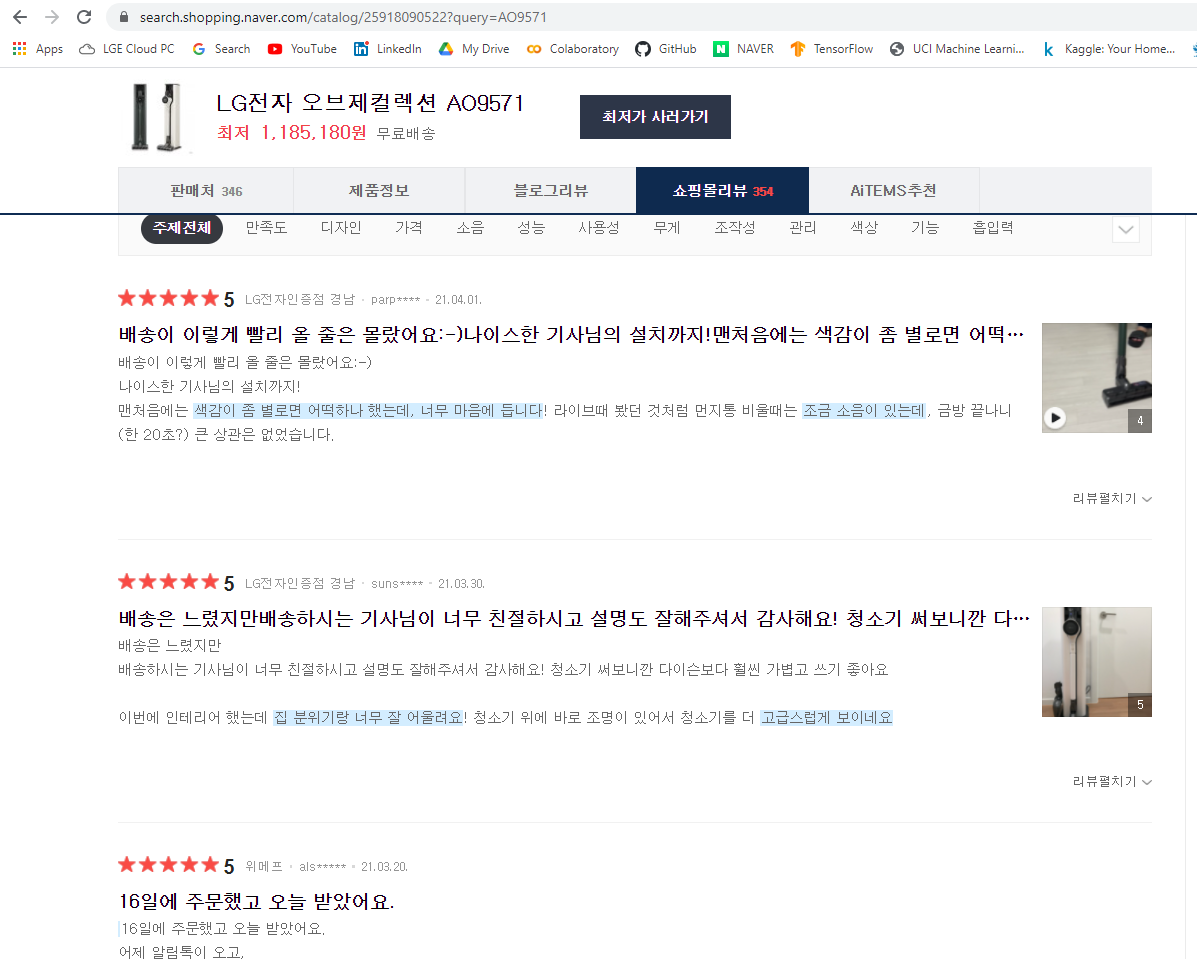

## Package install 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

In [ ]:
!pip install transformers==2.11.0
!pip install tensorflow==2.2.0



---



*NOTE!! At this moment, please restart runtime on Colab*

---



## Data scraping with Selenium

In [ ]:
!pip install selenium

     |████████████████████████████████| 911kB 21.2MB/s 


In [ ]:
!apt-get update 
!apt install chromium-chromedriver

In [ ]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
import selenium
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
import urllib.request
import time
import pandas as pd

def get_NAVER_shopping_customer_review_selenium(url, page_num):
  df = pd.DataFrame(columns=('title','score','market','date','review'))
  wd = webdriver.Chrome('chromedriver', options=chrome_options)
  wd.get(url)

  idx = 0
  for page_no in range(1, page_num+1):
    try:
      page_url = '//*[@id="section_review"]/div[3]/a[' + str(page_no) + ']'       
      page = wd.find_element_by_xpath(page_url)
      page.click()
      time.sleep(1)
    except:
      break

    info_list = wd.find_elements_by_class_name('reviewItems_etc_area__2P8i3')
    content_list = wd.find_elements_by_class_name('reviewItems_review__1eF8A')

    for i, j in zip(info_list, content_list):
      score = i.find_element_by_class_name('reviewItems_average__16Ya-').text.replace('평점', '')  #i.text[2] 
      market = i.find_elements_by_class_name('reviewItems_etc__1YqVF')[0].text #i.text[3:-9]
      date = i.find_elements_by_class_name('reviewItems_etc__1YqVF')[2].text #i.text[-9:]
      title = j.find_element_by_class_name('reviewItems_title__39Z8H').text 
      review = j.find_element_by_class_name('reviewItems_text__XIsTc').text 
      df.loc[idx] = [title, score, market, date, review]
      idx += 1

    print("Page: {}".format(page_no, dtype=int))

  return df

In [ ]:
url = "https://search.shopping.naver.com/catalog/25918090522?query=AO9571"
df = get_NAVER_shopping_customer_review_selenium(url, 30)
df

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11


,title,score,market,date,review
0,배송이 이렇게 빨리 올 줄은 몰랐어요:-)나이스한 기사님의 설치까지!맨처음에는 색감...,5,LG전자인증점 경남,21.04.01.,배송이 이렇게 빨리 올 줄은 몰랐어요:-)\n나이스한 기사님의 설치까지!\n맨처음에...
1,배송은 느렸지만배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! 청소...,5,LG전자인증점 경남,21.03.30.,배송은 느렸지만\n배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! ...
2,16일에 주문했고 오늘 받았어요.,5,위메프,21.03.20.,"16일에 주문했고 오늘 받았어요.\n어제 알림톡이 오고,\n오늘 아침 시간약속전화주..."
3,배송도 1주만에 왔네요. 생각외로 금방 왔어요! 가격,5,SSG닷컴,21.04.18.,"배송도 1주만에 왔네요. 생각외로 금방 왔어요!\n가격 때문에 많은 고민을 했는데,..."
4,역시 코드제로 올인원! 원래 코드제로는 성능 좋고 가볍,5,SSG닷컴,21.03.14.,역시 코드제로 올인원!\n원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 ...
...,...,...,...,...,...
215,좋아요,4,11번가,21.03.18.,47평집 청소하려 구매했는데집이 넓어서인지 팔목이 좀 아파요...ㅠㅜ청소다음 쓰레기...
216,최고예요,5,11번가,21.04.19.,배송도 빠르고~~상품은 말할 필요없고우리나라 최저가~~~~~입니다.최고의 선택이였네요
217,최고예요,5,11번가,21.03.20.,디자인이랑 색감에 홀딱반함?배송 적어도 5-10일 생각해야 할듯.기사님들이 설치해주...
218,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~,5,KP프라자,21.04.03.,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~


In [ ]:
import numpy as np
df['score'] = df['score'].values.astype(np.int16)

## Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

### score

In [ ]:
df['score'].value_counts()

5    198
4     20
3      1
2      1
Name: score, dtype: int64

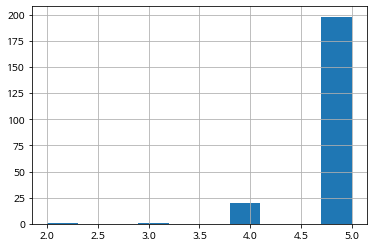

In [ ]:
df['score'].hist()

### market (seller)

In [ ]:
len(df['market'].unique())

19

In [ ]:
df['market'].unique()

array(['LG전자인증점 경남', '위메프', 'SSG닷컴', '11번가', 'CJmall', '전자랜드', '신세계몰',
       'GSSHOP', 'KP프라자', '롯데홈쇼핑', '하이마트쇼핑몰', '인터파크', '선', '롯데백화점', '옥션',
       '홈앤쇼핑', 'G마켓', '케이엔디지털', '신세계티비쇼핑'], dtype=object)

In [ ]:
df['market'].value_counts()

11번가          63
전자랜드          28
GSSHOP        28
LG전자인증점 경남    18
SSG닷컴         17
KP프라자         11
신세계몰          11
위메프           11
롯데홈쇼핑          7
하이마트쇼핑몰        5
롯데백화점          4
CJmall         4
선              3
홈앤쇼핑           3
G마켓            2
옥션             2
케이엔디지털         1
인터파크           1
신세계티비쇼핑        1
Name: market, dtype: int64

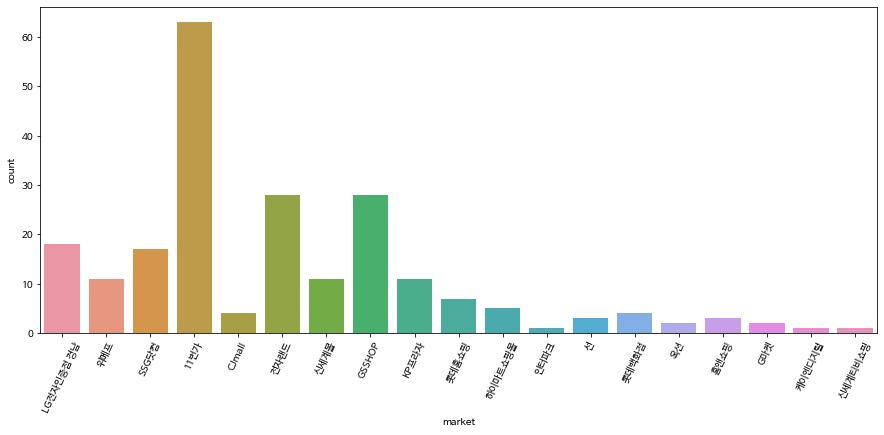

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.countplot(x='market', data=df)

### statistical analysis



In [ ]:
df2 = pd.DataFrame(columns=('market seller','total count','average score'))
for i in range(len(df['market'].unique())):
  seller = df['market'].unique()[i]
  tot_count = len(df[df['market']==seller].index)
  avg_score = df[df['market']==seller]['score'].values.astype(np.int16).mean()
  df2.loc[i] = [seller, tot_count, avg_score]

In [ ]:
df2_count = df2.sort_values(by='total count', ascending=False)
df2_count

,market seller,total count,average score
3,11번가,63,4.888889
5,전자랜드,28,5.000000
7,GSSHOP,28,4.857143
0,LG전자인증점 경남,18,4.888889
2,SSG닷컴,17,4.823529
8,KP프라자,11,4.636364
1,위메프,11,5.000000
6,신세계몰,11,4.909091
9,롯데홈쇼핑,7,4.857143
10,하이마트쇼핑몰,5,5.000000


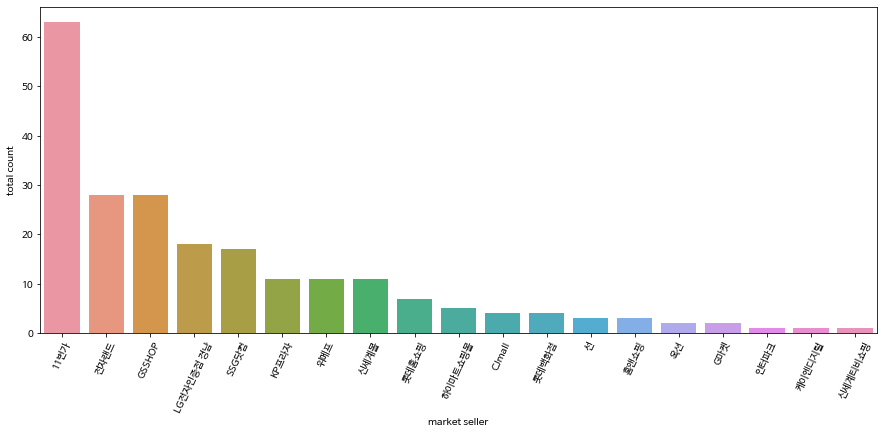

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.barplot(x='market seller',y='total count', data=df2_count)

In [ ]:
df2_score = df2.sort_values(by='average score', ascending=False)
df2_score

,market seller,total count,average score
18,신세계티비쇼핑,1,5.000000
10,하이마트쇼핑몰,5,5.000000
16,G마켓,2,5.000000
15,홈앤쇼핑,3,5.000000
14,옥션,2,5.000000
5,전자랜드,28,5.000000
13,롯데백화점,4,5.000000
12,선,3,5.000000
1,위메프,11,5.000000
6,신세계몰,11,4.909091


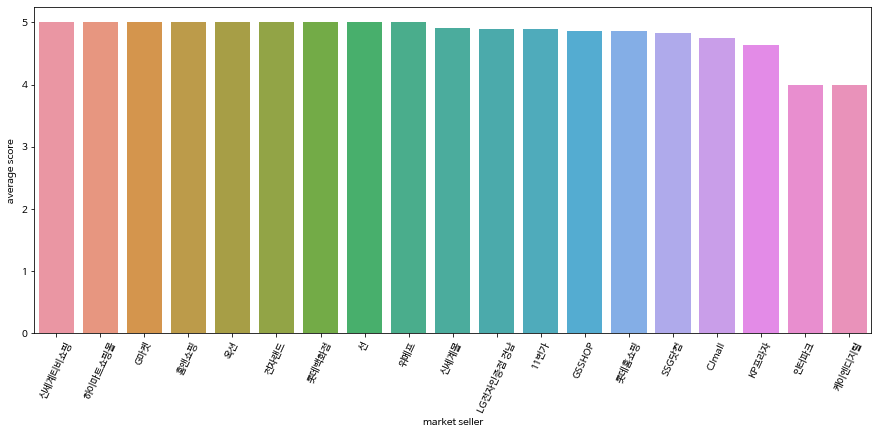

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.barplot(x='market seller',y='average score', data=df2_score)

### low score

In [ ]:
df_low_score = df[df['score']<4]
df_low_score

,title,score,market,date,review
16,기존보유한 청소기 이용시간이 짧아 추가 청소기가 필요해서 큰맘먹고 샀는데 보기보다 ...,3,LG전자인증점 경남,21.04.10.,기존보유한 청소기 이용시간이 짧아 추가 청소기가 필요해서 큰맘먹고 샀는데 보기보다 ...
58,물에 젖어서 왔는데 이슬도 맺혀있고 기분이 나쁘네요.반품 하려다 그냥 씁니다.어떤 ...,2,KP프라자,21.04.08.,물에 젖어서 왔는데 이슬도 맺혀있고 기분이 나쁘네요.반품 하려다 그냥 씁니다.어떤 ...


In [ ]:
for i in range(len(df_low_score)):
  low_review = df_low_score.loc[df_low_score.index[i]]['review']
  print("{}: {}".format(i, low_review))

0: 기존보유한 청소기 이용시간이 짧아 추가 청소기가 필요해서 큰맘먹고 샀는데 보기보다 무겁고 핸들링이 어려워요. 좌우만 잘돌아가고 침대아래쪽 같은곳은 청소기봉 길이도 짧고 액세서리툴 유용성이라던지 아직은 좀 부족한것 같아요. 다이슨이랑 같이 보완하면서 쓰고 있습니다.
1: 물에 젖어서 왔는데 이슬도 맺혀있고 기분이 나쁘네요.반품 하려다 그냥 씁니다.어떤 보상도 있어야 할 듯 합니다.


## Keyword analysis

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in df['review']:
  for noun in tagger.nouns(review):
    nouns.append(noun)
nouns[:10]

['배송', '줄', '나이스', '기사', '설치', '처음', '색감', '마음', '라이브', '때']

In [ ]:
stop_words = "청소기 LG 전자 오브제 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 \
  중 듯 때 게 내 말 나 수 거 점 것 이 있 하 것 들 그 되 수 이 보 않 없 \
  나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말	일 그렇 위하 때문 \
  그것 두	말하 알	그러 받	못하 일	그런 또 문제 더 사회 많	그리 좋	크 \
  따르 중	나오 가지 씨 시키 만들 지금 생각 \
  그러 속	하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 \
  그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 \
  싶 말 정도 좀 원 잘 통하 소리 놓 \
  맘 후 굿"	
stop_words = stop_words.split(' ')

In [ ]:
nouns = []
for review in df['review']:
  for noun in tagger.nouns(review):
    if noun not in stop_words: #stopwords
      nouns.append(noun)
nouns[:10]

['배송', '나이스', '기사', '설치', '처음', '색감', '마음', '라이브', '지통', '소음']

### frequent nouns

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'가격': 30,
 '가능': 8,
 '가전': 10,
 '감사': 16,
 '거실': 8,
 '고급': 12,
 '고민': 9,
 '구매': 42,
 '구입': 14,
 '기능': 34,
 '기사': 41,
 '기존': 12,
 '다이슨': 19,
 '디자인': 44,
 '마음': 9,
 '만족': 55,
 '만큼': 11,
 '먼지': 58,
 '무게': 14,
 '무선': 19,
 '무엇': 9,
 '물걸레': 41,
 '방문': 8,
 '배송': 97,
 '배터리': 12,
 '사용': 72,
 '상품': 12,
 '선물': 9,
 '설명': 32,
 '설치': 37,
 '성능': 28,
 '소음': 37,
 '신세계': 9,
 '엘지': 16,
 '올인원': 9,
 '유선': 10,
 '인테리어': 10,
 '자동': 26,
 '제품': 36,
 '주문': 25,
 '지통': 32,
 '청소': 71,
 '최고': 15,
 '충전': 9,
 '친절': 25,
 '타워': 14,
 '편리': 12,
 '하나': 8,
 '흡입': 15,
 '흡입력': 18}

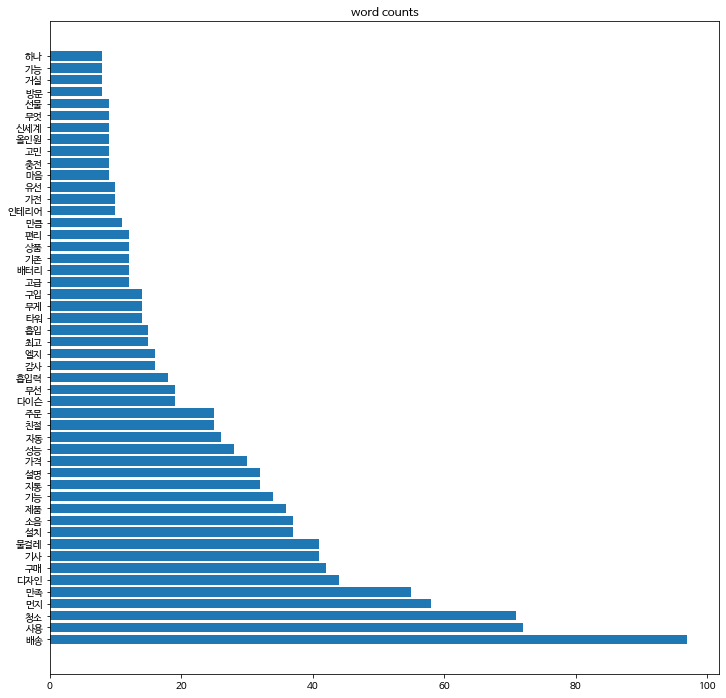

In [ ]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('word counts')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

### word cloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(background_color='white',
               font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

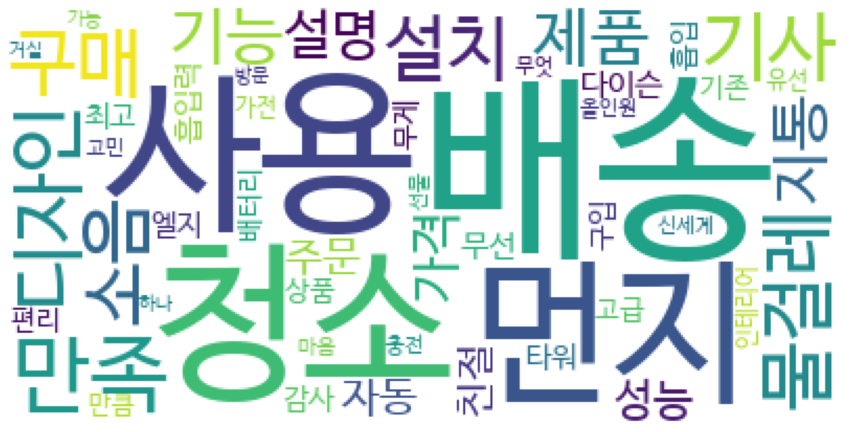

In [ ]:
figure = plt.figure(figsize=(15,15))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

### squarify

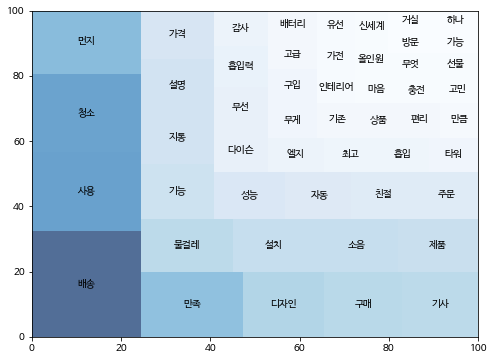

In [ ]:
!pip install squarify
import squarify
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]
figure = plt.figure(figsize=(8,6))
squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);

## Sentiment analysis (positive or negative classification)

### data prepare

In [ ]:
df_nlp = pd.DataFrame(columns=('score','review','label'))
df_nlp['score'] = df['score']
df_nlp['review'] = df['review']
df_nlp

,score,review,label
0,5,배송이 이렇게 빨리 올 줄은 몰랐어요:-)\n나이스한 기사님의 설치까지!\n맨처음에...,NaN
1,5,배송은 느렸지만\n배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! ...,NaN
2,5,"16일에 주문했고 오늘 받았어요.\n어제 알림톡이 오고,\n오늘 아침 시간약속전화주...",NaN
3,5,"배송도 1주만에 왔네요. 생각외로 금방 왔어요!\n가격 때문에 많은 고민을 했는데,...",NaN
4,5,역시 코드제로 올인원!\n원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 ...,NaN
...,...,...,...
215,4,47평집 청소하려 구매했는데집이 넓어서인지 팔목이 좀 아파요...ㅠㅜ청소다음 쓰레기...,NaN
216,5,배송도 빠르고~~상품은 말할 필요없고우리나라 최저가~~~~~입니다.최고의 선택이였네요,NaN
217,5,디자인이랑 색감에 홀딱반함?배송 적어도 5-10일 생각해야 할듯.기사님들이 설치해주...,NaN
218,5,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~,NaN


In [ ]:
def labeling(row):
  if row['score'] > 3:
    return 1
  else:
    return 0

df_nlp['label'] = df_nlp.apply(labeling, axis=1) 
df_nlp

,score,review,label
0,5,배송이 이렇게 빨리 올 줄은 몰랐어요:-)\n나이스한 기사님의 설치까지!\n맨처음에...,1
1,5,배송은 느렸지만\n배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! ...,1
2,5,"16일에 주문했고 오늘 받았어요.\n어제 알림톡이 오고,\n오늘 아침 시간약속전화주...",1
3,5,"배송도 1주만에 왔네요. 생각외로 금방 왔어요!\n가격 때문에 많은 고민을 했는데,...",1
4,5,역시 코드제로 올인원!\n원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 ...,1
...,...,...,...
215,4,47평집 청소하려 구매했는데집이 넓어서인지 팔목이 좀 아파요...ㅠㅜ청소다음 쓰레기...,1
216,5,배송도 빠르고~~상품은 말할 필요없고우리나라 최저가~~~~~입니다.최고의 선택이였네요,1
217,5,디자인이랑 색감에 홀딱반함?배송 적어도 5-10일 생각해야 할듯.기사님들이 설치해주...,1
218,5,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~,1


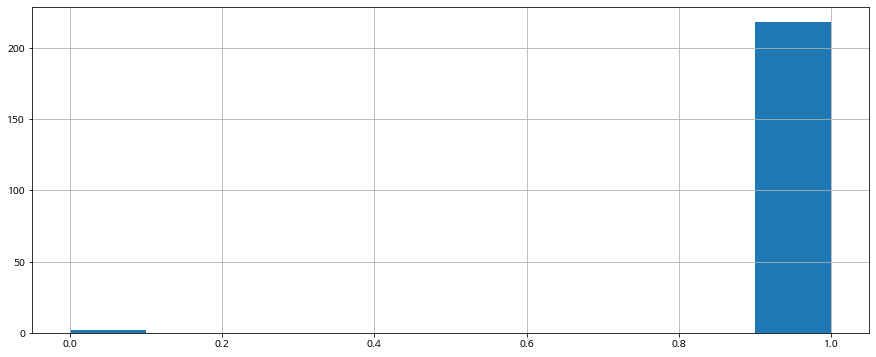

In [ ]:
df_nlp['label'].hist()

데이터가 너무 1 (고객 평가 4,5)로 치중되어 있어서, 적절한 학습이 되기 어렵다. 모델의 학습 정확도가 높다고 하더라도 제대로 학습이 되었다고 보기 어려울 것이다.
현재는 적합한 데이터가 없으므로, 우선 수집한 웹데이터를 기반으로 학습해본다. 추후 데이터 수집이 좀 더 필요하다. 

### BERT model

In [ ]:
import os
import re
import json
import copy
from tqdm import tqdm
import tensorflow as tf
from transformers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
tf.random.set_seed(111)
np.random.seed(111)

BATCH_SIZE = 32
NUM_EPOCHS = 10
VALID_SPLIT = 0.2
MAX_LEN = 100

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', 
                                          cache_dir='bert_ckpt',
                                          do_lower_case=False)

In [ ]:
def bert_tokenizer(sentence, MAX_LEN):
  encoded_dict = tokenizer.encode_plus(
      text = sentence,
      add_special_tokens = True,
      max_length = MAX_LEN,
      pad_to_max_length = True,
      return_attention_mask = True
  )

  input_id = encoded_dict['input_ids']
  attention_mask = encoded_dict['attention_mask']
  token_type_id = encoded_dict['token_type_ids']
  
  return input_id, attention_mask, token_type_id

In [ ]:
input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

for train_sentence, train_label in tqdm(zip(df_nlp['review'], df_nlp['label']), total=len(df_nlp)):
  try:
    input_id, attention_mask, token_type_id = bert_tokenizer(train_sentence, MAX_LEN)
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    token_type_ids.append(token_type_id)
    train_data_labels.append(train_label)
  except Exception as e:
    print(e)
    pass

train_input_ids = np.array(input_ids, dtype=int)
train_attention_masks= np.array(attention_masks, dtype=int)
train_token_type_ids = np.array(token_type_ids, dtype=int)
train_inputs = (train_input_ids, train_attention_masks, train_token_type_ids)
train_data_labels = np.asarray(train_data_labels, dtype=np.int32)
print("\nSentences: {}\nLabels: {}".format(len(train_input_ids), len(train_data_labels)))

100%|██████████| 220/220 [00:00<00:00, 1633.89it/s]


Sentences: 220
Labels: 220


In [ ]:
idx=5
input_id = train_input_ids[idx]
attention_mask = train_attention_masks[idx]
token_type_id = train_token_type_ids[idx]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[   101   9751  22333  12310   8908 100372  14843 118832  11287   9098
  12424  55910  14153   9074   8982  10892  12508   9670  30005   9524
  16985  30005  26737  11664    180  10240  73844   9989 119391  44359
   8852  80244   9157  98789  14102  11018   9448  48132   9116  11664
   9641  16323  18392   8932  11903  26737  12424   8908 100372 119424
  12965  48549    106    113    184  10350  11261   9796 119265 119424
  54141  25503   9993  14867    100   9748  81896   9521 118800  12424
  64002  18227  14867  19105   9654  17342  12424   9583  26737  48549
    106    114   8932  79718  10530   9511  23990   9294  18471   9751
  22333  12310  12638   9379  25242   9521  59330  19105 119328    102]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [ ]:
class TFBertClassifier(tf.keras.Model):
  def __init__(self, model_name, dir_path, num_class):
    super(TFBertClassifier, self).__init__()
    self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
    self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
    self.classifier = tf.keras.layers.Dense(num_class,
      kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
      name='classifier')
  
  def call(self, inputs, attention_mask=None, toke_type_ids=None, training=False):
    outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=toke_type_ids)
    pooled_output = outputs[1]
    pooled_output = self.dropout(pooled_output, training=training)
    logits = self.classifier(pooled_output)

    return logits

cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                             dir_path='bert_ckpt',
                             num_class=2)

optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
model_name = "tf2_bert_naver_review"
es_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = os.path.join('./', model_name, 'weight.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("Directory already exists\n")
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} Directory create complete\n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True)

./tf2_bert_naver_review Directory create complete



In [ ]:
cls_model.summary()

Model: "tf_bert_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tf_bert_model (TFBertModel)  multiple                  177853440 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 177,854,978
Trainable params: 177,854,978
Non-trainable params: 0
_________________________________________________________________


### model fitting

In [ ]:
history = cls_model.fit(train_inputs, train_data_labels,
                        epochs=NUM_EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_split=VALID_SPLIT,
                        callbacks=[es_callback, cp_callback])

Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 0.1722 - accuracy: 0.9716
Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to ./tf2_bert_naver_review/weight.h5
6/6 [==============================] - 9s 1s/step - loss: 0.1722 - accuracy: 0.9716 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9886
Epoch 00002: val_accuracy did not improve from 1.00000
6/6 [==============================] - 3s 544ms/step - loss: 0.0668 - accuracy: 0.9886 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9886
Epoch 00003: val_accuracy did not improve from 1.00000
6/6 [==============================] - 3s 547ms/step - loss: 0.0637 - accuracy: 0.9886 - val_loss: 0.0070 - val_accuracy: 1.0000


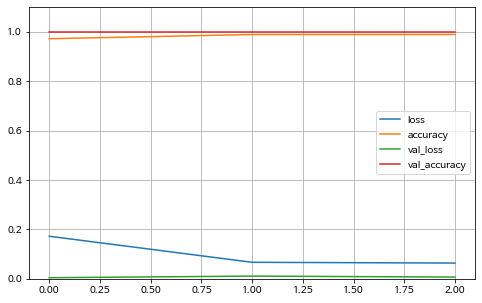

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1.1)
plt.show()

위에 언급한 것처럼, 편향된 데이터로 인해, 학습 정확도가 높다고 하더라도 제대로 학습이 되었다고 보기 어려울 것이다. 

### testing

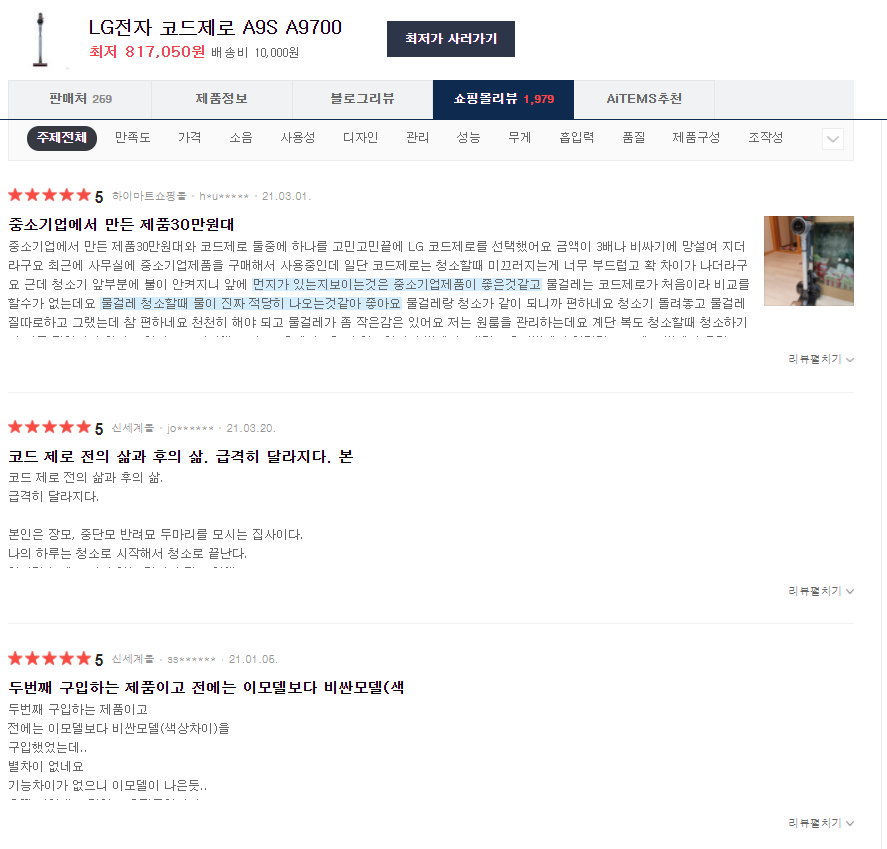

In [ ]:
url = "https://search.shopping.naver.com/catalog/22399251159?query=A9700"
df_test = get_NAVER_shopping_customer_review_selenium(url, 30)
df_test

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11
Page: 12
Page: 13
Page: 14


,title,score,market,date,review
0,중소기업에서 만든 제품30만원대,5,하이마트쇼핑몰,21.03.01.,중소기업에서 만든 제품30만원대와 코드제로 둘중에 하나를 고민고민끝에 LG 코드제로...
1,코드 제로 전의 삶과 후의 삶. 급격히 달라지다. 본,5,신세계몰,21.03.20.,"코드 제로 전의 삶과 후의 삶.\n급격히 달라지다.\n\n본인은 장모, 중단모 반려..."
2,두번째 구입하는 제품이고 전에는 이모델보다 비싼모델(색,5,신세계몰,21.01.05.,두번째 구입하는 제품이고\n전에는 이모델보다 비싼모델(색상차이)을\n구입했었는데.....
3,왜 지금까지 구매를 안했을까 싶,5,하이마트쇼핑몰,21.02.04.,왜 지금까지 구매를 안했을까 싶을정도로\n너무나 편하고 좋습니다.\n유선청소기를 쓸...
4,언니가 새집에 입주하여 집들이 선물로 뭘 사줄까? 고민,5,신세계몰,21.02.17.,언니가 새집에 입주하여 집들이 선물로 뭘 사줄까? 고민을 많이 했는데 필요한 것이 ...
...,...,...,...,...,...
274,생각보다 배송도 빨랐고 아주만족스럽습니다,5,롯데홈쇼핑,20.03.30.,생각보다 배송도 빨랐고 아주만족스럽습니다
275,고민하다가 신제품 출시된걸로 구,5,하이마트쇼핑몰,20.03.26.,고민하다가 신제품 출시된걸로 구입했는데 기다리다 사길 잘 한 것 같아요~^^ 설치도...
276,너무너무노무너무 만족합니다,5,하이마트쇼핑몰,20.04.12.,너무너무노무너무 만족합니다
277,상담사님이 애써 주셔서 청소기 잘 설치했습니다...,5,롯데홈쇼핑,20.03.30.,상담사님이 애써 주셔서 청소기 잘 설치했습니다\n\n\n\n이벤트 사은품은 언제 받...


In [ ]:
df_test['score'] = df_test['score'].values.astype(np.int16)
df_test_nlp = pd.DataFrame(columns=('score','review','label'))
df_test_nlp['score'] = df_test['score']
df_test_nlp['review'] = df_test['review']
df_test_nlp['label'] = df_test_nlp.apply(labeling, axis=1) 
df_test_nlp

,score,review,label
0,5,중소기업에서 만든 제품30만원대와 코드제로 둘중에 하나를 고민고민끝에 LG 코드제로...,1
1,5,"코드 제로 전의 삶과 후의 삶.\n급격히 달라지다.\n\n본인은 장모, 중단모 반려...",1
2,5,두번째 구입하는 제품이고\n전에는 이모델보다 비싼모델(색상차이)을\n구입했었는데.....,1
3,5,왜 지금까지 구매를 안했을까 싶을정도로\n너무나 편하고 좋습니다.\n유선청소기를 쓸...,1
4,5,언니가 새집에 입주하여 집들이 선물로 뭘 사줄까? 고민을 많이 했는데 필요한 것이 ...,1
...,...,...,...
274,5,생각보다 배송도 빨랐고 아주만족스럽습니다,1
275,5,고민하다가 신제품 출시된걸로 구입했는데 기다리다 사길 잘 한 것 같아요~^^ 설치도...,1
276,5,너무너무노무너무 만족합니다,1
277,5,상담사님이 애써 주셔서 청소기 잘 설치했습니다\n\n\n\n이벤트 사은품은 언제 받...,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e18191490>,
      dtype=object)

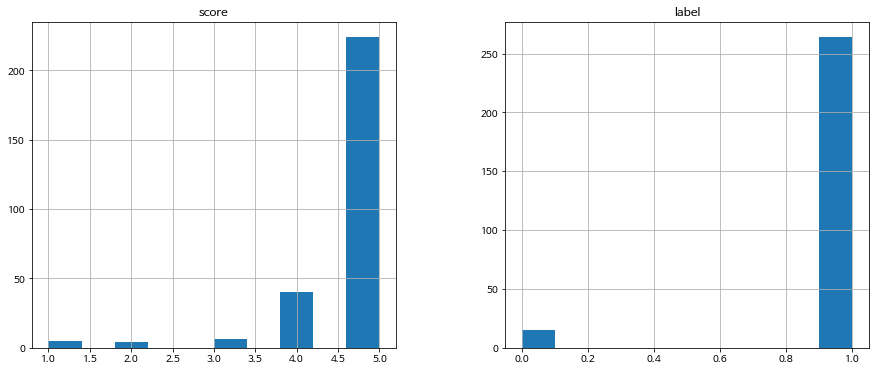

In [ ]:
df_test_nlp.hist()

In [ ]:
input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for test_sentence, test_label in tqdm(zip(df_test_nlp['review'], df_test_nlp['label']), total=len(df_test_nlp)):
  try:
    input_id, attention_mask, token_type_id = bert_tokenizer(test_sentence, MAX_LEN)
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    token_type_ids.append(token_type_id)
    test_data_labels.append(test_label)
  except Exception as e:
    print(e)
    pass

test_input_ids = np.array(input_ids, dtype=int)
test_attention_masks= np.array(attention_masks, dtype=int)
test_token_type_ids = np.array(token_type_ids, dtype=int)
test_inputs = (test_input_ids, test_attention_masks, test_token_type_ids)
test_data_labels = np.asarray(test_data_labels, dtype=np.int32)
print("\nSentences: {}\nLabels: {}".format(len(test_input_ids), len(test_data_labels)))

100%|██████████| 279/279 [00:00<00:00, 1021.26it/s]


Sentences: 279
Labels: 279


In [ ]:
cls_model.evaluate(test_inputs, test_data_labels)

9/9 [==============================] - 2s 191ms/step - loss: 0.2604 - accuracy: 0.9462


[0.2604050040245056, 0.9462365508079529]